<a href="https://colab.research.google.com/github/yuxuan0702/Hospital_Death_Analysis-/blob/master/analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import xgboost as xgb

from imblearn.over_sampling import SMOTE 
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import roc_auc_score,roc_curve, classification_report, confusion_matrix, accuracy_score ,auc
from sklearn.neighbors import KNeighborsClassifier
from xgboost import plot_tree
from xgboost import plot_importance

plt.style.use('ggplot')
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [0]:
#import dataset 
df=pd.read_csv('/content/drive/My Drive/kaggle/widsdatathon2020/cleanning.csv')
df.set_index('encounter_id',drop=True,inplace=True)
df.head()

,hospital_death,apache_post_operative,arf_apache,intubated_apache,ventilated_apache,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,elective_surgery,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,icu_admit_source_Floor,icu_admit_source_Operating Room / Recovery,icu_admit_source_Other Hospital,icu_admit_source_Other ICU,apache_3j_bodysystem_Gastrointestinal,apache_3j_bodysystem_Genitourinary,apache_3j_bodysystem_Gynecological,apache_3j_bodysystem_Hematological,apache_3j_bodysystem_Metabolic,apache_3j_bodysystem_Musculoskeletal/Skin,apache_3j_bodysystem_Neurological,apache_3j_bodysystem_Respiratory,apache_3j_bodysystem_Sepsis,apache_3j_bodysystem_Trauma,apache_2_bodysystem_Gastrointestinal,apache_2_bodysystem_Haematologic,apache_2_bodysystem_Metabolic,apache_2_bodysystem_Neurologic,apache_2_bodysystem_Renal/Genitourinary,apache_2_bodysystem_Respiratory,apache_2_bodysystem_Trauma,apache_2_bodysystem_Undefined Diagnoses,apache_2_bodysystem_Undefined diagnoses
encounter_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
66154,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,-3.335190,2.381214,-0.582790,-1.613473,0.051201,-0.075162,1.234154,-0.361049,-1.139653,-1.185600,1.717745,1.967171,0.934547,0.771339,-0.074759,1.224251,0.029751,-1.126761,-1.961089,1.347779,-1.305763,-0.064661,-0.494329,-0.555319,-0.228261,0.335358,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
114252,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,-3.543325,1.300965,-5.057589,2.526991,-2.252113,-0.893916,-0.447834,3.483589,-1.764876,1.375069,0.879093,-1.310932,1.363675,3.609753,1.969305,0.957194,1.209773,0.926078,-0.664469,0.450845,-1.308449,-0.542452,-0.673596,-0.749736,0.810751,1.082449,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
33181,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,6.194737,-1.749545,-1.100786,0.720175,1.771603,0.891253,0.398781,-0.911059,0.344284,0.661216,0.049648,0.743131,0.914935,-0.926319,-0.080965,-0.617036,-1.008736,1.242340,-0.845628,0.711307,1.021003,1.517570,-0.360611,-0.304196,-0.775773,0.329519,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
22471,0,0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,3.842202,-1.429704,-1.306985,1.363854,1.096950,-0.459458,0.974354,-1.540860,-0.525078,-0.689122,-0.749525,-0.239030,-0.283553,1.633762,2.693094,-0.840915,-0.113810,-1.552388,0.022887,-0.451576,0.046648,0.345329,0.852741,-0.657221,-0.165034,-0.781128,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
95460,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,3.476526,0.620637,0.258487,-2.901996,-1.774808,1.129664,-1.932921,3.860748,-0.466828,0.259060,-1.549944,-0.158186,-0.001860,0.520690,1.784978,-0.359896,0.191125,-0.311717,0.814498,2.298634,-0.946753,-0.310629,0.491395,-0.020898,-0.232440,1.169324,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [0]:
#define target and feature
y=df['hospital_death']
X=df.drop(columns='hospital_death')

# Train Test Split 


In [0]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42)

In [0]:
sm= SMOTE(random_state=42)

In [0]:
X_res, y_res = sm.fit_resample(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


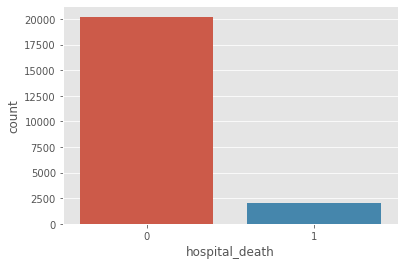

In [0]:
sns.countplot(y_train)

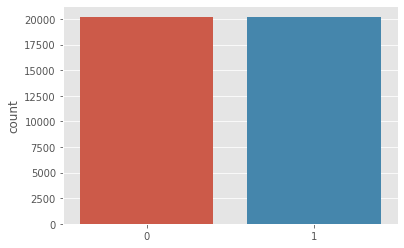

In [0]:
sns.countplot(y_res)

# Logistic Regression 

In [0]:
lr=LogisticRegression()

In [0]:
lr.fit(X_res,y_res)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
y_preds_lr=lr.predict(X_test)

In [0]:
log_score=accuracy_score(y_test,y_preds_lr)
log_score

0.7906098219104155

In [0]:
log_roc=roc_auc_score(y_test,y_preds_lr)
log_roc

0.7781649058926098

# KNN

In [0]:
#find the best knn model 
score=[]
for i in range (1,20,1):
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_res,y_res)
  print(i,roc_auc_score(y_test,knn.predict(X_test)))
  score.append(knn.score(X_test,y_test))

1 0.6603030924662803
2 0.639487922457562
3 0.6982249089696908
4 0.6851537258320939
5 0.7086837786553157
6 0.701811631365711
7 0.7163219908713268
8 0.7162001897533207
9 0.7221428021949843
10 0.7178477101389814
11 0.7271590850812862
12 0.7255019488178881
13 0.7247647315246936
14 0.7274635878763012
15 0.7325183342735524
16 0.7330311810862096
17 0.7302425765423867
18 0.7313516077747576
19 0.72980024616647


we can find that knn16 is the best model 

In [0]:
knn16=KNeighborsClassifier(n_neighbors=16)

In [0]:
knn16.fit(X_res,y_res)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=16, p=2,
                     weights='uniform')

In [0]:
knn_score=knn16.score(X_test,y_test)
knn_pred_y=knn16.predict(X_test)
knn_roc=roc_auc_score(y_test,knn_pred_y)
print('knn score:', knn_score,'knn roc:',knn_roc)

knn score: 0.7319661809678 knn roc: 0.7330311810862096


# XGBOOST

In [0]:
xg_cl=xgb.XGBClassifier(objective='binary:logistic')
xg_cl.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
y_preds_xgb=xg_cl.predict(X_test)

In [0]:
xgb_score=accuracy_score(y_test,y_preds_xgb)
xgb_roc=roc_auc_score(y_test,y_preds_xgb)
print('xgb_score:', xgb_score, 'xgb_roc: ',xgb_roc)

xgb_score: 0.9163518618456556 xgb_roc:  0.5919502282168316


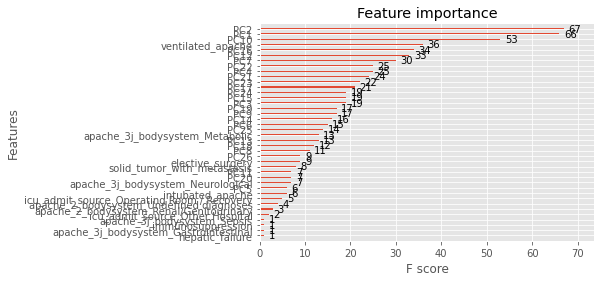

In [0]:
plot_importance(xg_cl)
plt.show()

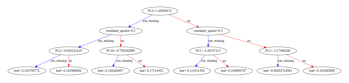

In [0]:
plot_tree(xg_cl)

# Gradient Boost 

In [0]:
#fit the gradient boost model 
gb=GradientBoostingClassifier()
gb.fit(X_res,y_res)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [0]:
y_preds_gb=gb.predict(X_test)

In [0]:
gb_score=accuracy_score(y_test,y_preds_gb)
gb_roc=roc_auc_score(y_test,y_preds_gb)
print ( 'gb_score:',gb_score, 'gb_roc:',gb_roc)

gb_score: 0.8933261377945674 gb_roc: 0.6896539566131598


# Random Frost 

## basic random forest model 

In [0]:
rf=RandomForestClassifier(random_state=42)

In [0]:
rf.fit(X_res,y_res)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [0]:
rf_score=accuracy_score(y_test,y_preds_gb)
rf_roc=roc_auc_score(y_test,y_preds_gb)
print ( 'rf_score:',gb_score, 'rf_roc:',gb_roc)

rf_score: 0.8933261377945674 rf_roc: 0.6896539566131598


## hyperparameter Tuning 
We cound find that there are some hyperparameters we can tuning in the random forest : 
**criterion**,**max_depth**,**min_samples_leaf**,**min_samples_split**,**n_estimators**...

We are going to tuning those parameters here.
We used randomizedsearch here which is more efficient than gridsearch 

### Max depth

In [0]:
param_test1={'max_depth':range(10,62,10)}

In [0]:
cv1=RandomizedSearchCV(rf,
                   param_distributions=param_test1,
                   n_iter=10,
                   scoring='roc_auc',
                   refit=True,
                   cv=10,
                   return_train_score=True)

In [0]:
cv1.fit(X_res,y_res)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
              

In [0]:
pd.DataFrame(cv1.cv_results_)[['param_max_depth','rank_test_score']]

,param_max_depth,rank_test_score
0,10,6
1,20,5
2,30,4
3,40,1
4,50,2
5,60,2


In [0]:
cv1_score=accuracy_score(y_test,cv1.predict(X_test))
cv1_roc=roc_auc_score(y_test,cv1.predict(X_test))
print('cv1 score:',cv1_score,'cv1 roc:',cv1_roc)

cv1 score: 0.9091563230796906 cv1 roc: 0.6287469870249756


### Min samples leaf and min samples split

In [0]:
rf2=RandomForestClassifier(random_state=42,max_depth=40)

In [0]:
param_test2= {'min_samples_split':range(80,150,20),
              'min_samples_leaf':range(10,60,10)}

In [0]:
cv2=RandomizedSearchCV(rf2,
                   param_distributions=param_test2,
                   n_iter=10,
                   scoring='roc_auc',
                   refit=True,
                   cv=10,
                   return_train_score=True)

In [0]:
cv2.fit(X_res,y_res)

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=40,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                

In [0]:
pd.DataFrame(cv2.cv_results_)[['params','rank_test_score']]

,params,rank_test_score
0,"{'min_samples_split': 100, 'min_samples_leaf':...",2
1,"{'min_samples_split': 140, 'min_samples_leaf':...",10
2,"{'min_samples_split': 140, 'min_samples_leaf':...",8
3,"{'min_samples_split': 80, 'min_samples_leaf': 20}",3
4,"{'min_samples_split': 80, 'min_samples_leaf': 10}",1
5,"{'min_samples_split': 120, 'min_samples_leaf':...",9
6,"{'min_samples_split': 80, 'min_samples_leaf': 50}",7
7,"{'min_samples_split': 100, 'min_samples_leaf':...",6
8,"{'min_samples_split': 80, 'min_samples_leaf': 40}",5
9,"{'min_samples_split': 100, 'min_samples_leaf':...",4


In [0]:
cv2_score=accuracy_score(y_test,cv2.predict(X_test))
cv2_roc=roc_auc_score(y_test,cv2.predict(X_test))
print('cv2 score:',cv2_score,'cv2 roc:',cv2_roc)

cv2 score: 0.8938658032020147 cv2 roc: 0.6933496589568695


### Criterion and n_estimators 

In [0]:
rf3=RandomForestClassifier(random_state=42,
                           max_depth=40,
                           min_samples_split=80,
                           min_samples_leaf=10)

In [0]:
rf3.fit(X_res,y_res)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=40, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=80,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [0]:
param_test3={'criterion':('gini','entropy'),
    'n_estimators':range(1,100,10)}

In [0]:
cv3=RandomizedSearchCV(rf3,
                          param_distributions=param_test3,
                          n_iter=10,
                          scoring='roc_auc',
                          refit=True,
                          cv=10,
                          return_train_score=True
                          )

In [0]:
cv3.fit(X_res,y_res)

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=40,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=10,
                                                    min_samples_split=80,
                                                    min_weight_fraction_leaf=0.0,
              

In [0]:
pd.DataFrame(cv3.cv_results_)[['params','rank_test_score']]

,params,rank_test_score
0,"{'n_estimators': 61, 'criterion': 'gini'}",5
1,"{'n_estimators': 41, 'criterion': 'entropy'}",3
2,"{'n_estimators': 1, 'criterion': 'entropy'}",10
3,"{'n_estimators': 71, 'criterion': 'entropy'}",1
4,"{'n_estimators': 31, 'criterion': 'gini'}",7
5,"{'n_estimators': 61, 'criterion': 'entropy'}",2
6,"{'n_estimators': 41, 'criterion': 'gini'}",6
7,"{'n_estimators': 11, 'criterion': 'entropy'}",8
8,"{'n_estimators': 71, 'criterion': 'gini'}",4
9,"{'n_estimators': 11, 'criterion': 'gini'}",9


In [0]:
cv3_score=accuracy_score(y_test,cv3.predict(X_test))
cv3_roc=roc_auc_score(y_test,cv3.predict(X_test))
print('cv3 score:',cv3_score,'cv3 roc:',cv3_roc)

cv3 score: 0.8962043533009534 cv3 roc: 0.6912437817323966


## Visualiza final model ROC curve 

In [0]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

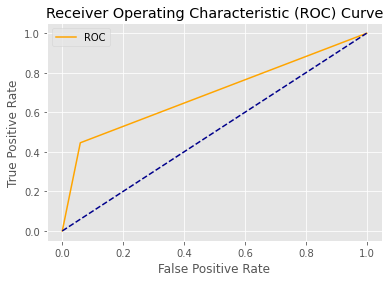

AUC-ROC : <function auc at 0x7f68cdf8d0d0>


In [0]:
fpr, tpr, thresholds = roc_curve(y_test,cv2.predict(X_test))
plot_roc_curve(fpr, tpr)
print("AUC-ROC :",auc)

## Visualize the feature importances

In [0]:
importances = pd.Series(data=rf3.feature_importances_,
                        index= X_train.columns)

In [0]:
# Sort importances
importances_sorted = importances.sort_values().tail(30)
importances_sorted

PC6                                           0.006582
solid_tumor_with_metastasis                   0.006936
PC14                                          0.006973
PC22                                          0.007057
PC3                                           0.007784
PC15                                          0.007825
PC9                                           0.008107
PC17                                          0.009047
PC21                                          0.009431
PC16                                          0.009811
PC12                                          0.011661
PC7                                           0.012087
apache_2_bodysystem_Metabolic                 0.014972
apache_3j_bodysystem_Metabolic                0.015023
apache_3j_bodysystem_Neurological             0.015278
apache_2_bodysystem_Neurologic                0.016257
apache_3j_bodysystem_Gastrointestinal         0.017249
apache_2_bodysystem_Gastrointestinal          0.018856
apache_3j_

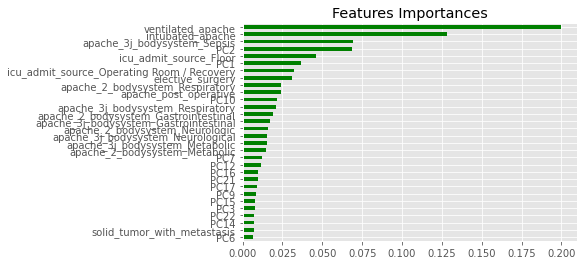

In [0]:
# Draw a horizontal barplot of importances_sorted
plt.style.use('ggplot')
importances_sorted.plot(kind='barh', color='green')
plt.title('Features Importances')
plt.show()

# Summary 

In [0]:
summary_algorithm=pd.DataFrame({'accuracy':[log_score,rf_score,xgb_score,gb_score,knn_score],
              'roc_score':[log_roc,rf_roc,xgb_roc,gb_roc,knn_roc]},
             index=['Logistic Regression','Random Forest','xgboost','gradient boost','knn'])

In [0]:
summary_algorithm.sort_values(by='roc_score',ascending=False)

,accuracy,roc_score
Logistic Regression,0.790610,0.778165
knn,0.731966,0.733031
Random Forest,0.893326,0.689654
gradient boost,0.893326,0.689654
xgboost,0.916352,0.591950


In [0]:
summary_rf=pd.DataFrame({'accuracy':[rf_score,cv1_score,cv2_score,cv3_score],
                         'roc_score':[rf_roc,cv1_roc,cv2_roc,cv3_roc]},
                         index=['rf','cv1','cv2','cv3'])

In [0]:
summary_rf.sort_values(by='roc_score',ascending=False)

,accuracy,roc_score
cv2,0.893866,0.693350
cv3,0.896204,0.691244
rf,0.893326,0.689654
cv1,0.909156,0.628747


# Test 

In [0]:
unlabel=pd.read_csv('/content/drive/My Drive/widsdatathon2020/unlabel_clean.csv')
unlabel.set_index('encounter_id',drop=True,inplace=True)
unlabel_X=unlabel.drop(columns='hospital_death')
unlabel_X

,apache_post_operative,arf_apache,intubated_apache,ventilated_apache,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,elective_surgery,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,icu_admit_source_Floor,icu_admit_source_Operating Room / Recovery,icu_admit_source_Other Hospital,icu_admit_source_Other ICU,apache_3j_bodysystem_Gastrointestinal,apache_3j_bodysystem_Genitourinary,apache_3j_bodysystem_Gynecological,apache_3j_bodysystem_Hematological,apache_3j_bodysystem_Metabolic,apache_3j_bodysystem_Musculoskeletal/Skin,apache_3j_bodysystem_Neurological,apache_3j_bodysystem_Respiratory,apache_3j_bodysystem_Sepsis,apache_3j_bodysystem_Trauma,apache_2_bodysystem_Gastrointestinal,apache_2_bodysystem_Haematologic,apache_2_bodysystem_Metabolic,apache_2_bodysystem_Neurologic,apache_2_bodysystem_Renal/Genitourinary,apache_2_bodysystem_Respiratory,apache_2_bodysystem_Trauma,apache_2_bodysystem_Undefined Diagnoses,apache_2_bodysystem_Undefined diagnoses
encounter_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2.773561,1.571725e-13,-6.755196e-15,5.791781e-15,3.002813e-15,-2.856862e-16,4.857445e-15,6.702211e-15,-2.105768e-15,-1.562679e-14,1.223783e-15,8.180958e-15,-5.251765e-15,2.090666e-14,7.676531e-16,1.593767e-14,8.724164e-15,3.625827e-15,9.267746e-15,-9.148908e-16,-1.206024e-14,7.135710e-15,-4.910392e-15,2.891148e-15,8.015136e-15,-1.168297e-14,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
5,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,-0.831855,6.917646e-15,4.727516e-14,3.707327e-14,8.068556e-15,-1.096666e-15,-8.098597e-15,-1.551373e-14,-5.448213e-15,-2.958411e-15,4.041300e-15,-6.054973e-16,-3.555521e-15,8.276569e-15,5.968675e-15,-1.942744e-14,2.208522e-14,1.810026e-14,2.857952e-16,2.517104e-14,5.207924e-15,2.057945e-14,-9.689375e-15,8.905534e-15,5.949300e-15,1.834060e-14,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
7,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,-2.377033,1.416205e-15,-9.110064e-15,2.336342e-15,-1.742633e-14,-9.881124e-15,6.799239e-15,-4.742557e-16,2.000639e-15,-1.495705e-14,4.282966e-15,2.655373e-15,-4.637523e-15,1.428742e-14,3.165729e-15,-1.678931e-14,2.808824e-14,1.471638e-14,1.818662e-14,-2.156527e-14,-5.010015e-15,8.597034e-14,3.036898e-14,3.247860e-15,-1.505271e-14,1.540096e-14,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0,-1.346914,-1.097668e-15,1.128389e-15,-1.306359e-15,1.332072e-15,-1.093659e-15,-5.050938e-15,-2.595045e-15,3.407709e-16,3.200795e-15,3.564878e-16,-6.676909e-16,1.301108e-16,7.553708e-17,-3.894055e-15,-1.331228e-14,-2.104086e-14,-1.539868e-14,-5.230336e-15,7.259880e-14,-4.008219e-15,-4.542290e-14,-4.297752e-14,6.271290e-18,9.844959e-15,1.679891e-14,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
10,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2.773561,1.848822e-15,-1.638664e-15,5.716898e-15,-1.500719e-14,-1.168326e-14,2.786883e-15,-1.711758e-14,3.446221e-16,-6.359607e-15,-2.197240e-15,-3.345358e-15,4.811566e-15,-2.651714e-14,-9.892444e-15,2.435102e-14,1.983112e-14,1.541108e-14,6.378608e-14,1.023372e-13,-1.125195e-14,1.244256e-14,-2.518614e-14,-3.288167e-14,-2.982191e-14,4.308198e-14,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131035,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,13.589807,-5.017671e-16,3.332903e-15,1.732035e-15,-2.838772e-16,5.998905e-16,-5.133027e-16,6.239465e-16,4.973902e-16,-5.015930e-16,-3.477597e-16,-5.156966e-17,-1.034672e-16,3.667674e-16,-1.232480e-16,4.876600e-16,9.796581e-18,1.648923e-16,1.690045e-16,-1.052805e-16,-3.058974e-16,1.210986e-16,-2.119732e-16,6.241449e-17,2.417399e-16,-3.109838e-16,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
131

In [0]:
unlabel_X.isna().sum().sort_values(ascending=False).head(10)

lymphoma                       179
arf_apache                     179
intubated_apache               179
ventilated_apache              179
cirrhosis                      179
hepatic_failure                179
immunosuppression              179
leukemia                       179
solid_tumor_with_metastasis    179
PC14                             0
dtype: int64

## fill missing with mode 

In [0]:
unlabel_X['immunosuppression'].value_counts()
unlabel_X['immunosuppression']=unlabel_X['immunosuppression'].fillna(0)
unlabel_X['solid_tumor_with_metastasis'].value_counts()
unlabel_X['solid_tumor_with_metastasis']=unlabel_X['solid_tumor_with_metastasis'].fillna(0)
unlabel_X['leukemia'].value_counts()
unlabel_X['leukemia']=unlabel_X['leukemia'].fillna(0)
unlabel_X['lymphoma'].value_counts()
unlabel_X['lymphoma']=unlabel_X['lymphoma'].fillna(0)
unlabel_X['arf_apache'].value_counts()
unlabel_X['arf_apache']=unlabel_X['arf_apache'].fillna(0)
unlabel_X['intubated_apache'].value_counts()
unlabel_X['intubated_apache']=unlabel_X['intubated_apache'].fillna(0)
unlabel_X['ventilated_apache'].value_counts()
unlabel_X['ventilated_apache']=unlabel_X['ventilated_apache'].fillna(0)
unlabel_X['cirrhosis'].value_counts()
unlabel_X['cirrhosis']=unlabel_X['cirrhosis'].fillna(0)
unlabel_X['hepatic_failure'].value_counts()
unlabel_X['hepatic_failure']=unlabel_X['hepatic_failure'].fillna(0)

## Make prediction

In [0]:
unlabel[['hospital_death']]=(cv2.predict_proba(unlabel_X)[:,1])

In [0]:
submission=unlabel[['hospital_death']]
submission

,hospital_death
encounter_id,
2,0.204436
5,0.068096
7,0.049489
8,0.304992
10,0.542909
...,...
131035,0.045928
131037,0.225061
131039,0.310880
